In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/ADA.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ADA.csv'

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-15,0.795761,0.884506,0.777413,0.778587,0.778587,972993024
1,2018-01-16,0.780621,0.780621,0.479944,0.626493,0.626493,1632649984
2,2018-01-17,0.624123,0.678517,0.440620,0.629102,0.629102,1713769984
3,2018-01-18,0.631295,0.711008,0.591528,0.659843,0.659843,1285490048
4,2018-01-19,0.649544,0.688520,0.615936,0.650498,0.650498,584574016
...,...,...,...,...,...,...,...
1457,2022-01-11,1.127857,1.193615,1.125648,1.185110,1.185110,1089929557
1458,2022-01-12,1.185551,1.306346,1.185551,1.304535,1.304535,1651269250
1459,2022-01-13,1.304656,1.350995,1.233161,1.233161,1.233161,2022506483
1460,2022-01-14,1.233370,1.306503,1.227105,1.290926,1.290926,1855980787


In [ ]:
df1=df.reset_index()['Close']

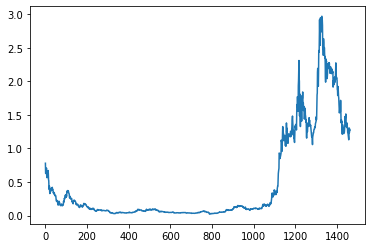

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(950, 512)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=7):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 9s 220ms/step - loss: 2.8926e-04 - val_loss: 0.0276
Epoch 2/100
14/14 [==============================] - 2s 144ms/step - loss: 6.9778e-05 - val_loss: 0.0322
Epoch 3/100
14/14 [==============================] - 2s 137ms/step - loss: 4.6957e-05 - val_loss: 0.0124
Epoch 4/100
14/14 [==============================] - 2s 117ms/step - loss: 4.2875e-05 - val_loss: 0.0200
Epoch 5/100
14/14 [==============================] - 2s 122ms/step - loss: 3.2351e-05 - val_loss: 0.0117
Epoch 6/100
14/14 [==============================] - 2s 122ms/step - loss: 3.5069e-05 - val_loss: 0.0122
Epoch 7/100
14/14 [==============================] - 2s 121ms/step - loss: 2.6477e-05 - val_loss: 0.0079
Epoch 8/100
14/14 [==============================] - 2s 123ms/step - loss: 2.5600e-05 - val_loss: 0.0126
Epoch 9/100
14/14 [==============================] - 2s 149ms/step - loss: 2.2150e-05 - val_loss: 0.0132
Epoch 10/100
14/14 [==============================] - 2

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.07095626414518065

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.8055679143796984

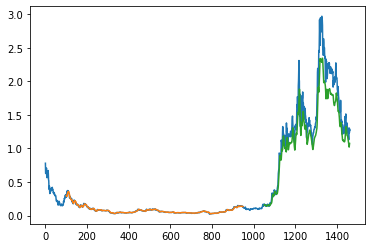

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data) - 100

412

In [ ]:
x_input=test_data[412:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.37500286]
101
1 day input [0.76169913 0.73812765 0.73003568 0.71162743 0.73535583 0.72900793
 0.74404998 0.73150429 0.72445673 0.71470901 0.70951215 0.73430192
 0.71753754 0.72351796 0.72780288 0.71306921 0.72007637 0.71828
 0.64167718 0.6671442  0.67528474 0.65668425 0.65926689 0.65416411
 0.66142396 0.69278105 0.66601082 0.6664605  0.67339022 0.67857417
 0.71340342 0.76403179 0.70572174 0.70019305 0.68668957 0.68918186
 0.68502091 0.67643952 0.62944939 0.6288737  0.59925387 0.62522357
 0.64456379 0.61672233 0.59525425 0.5864059  0.56464165 0.5527277
 0.51097722 0.51698821 0.53286205 0.53614061 0.51997196 0.51752993
 0.57447191 0.52053305 0.47439304 0.45992396 0.47598494 0.46122683
 0.46636663 0.43014926 0.40340212 0.45182113 0.44945518 0.40804129
 0.40718777 0.43741997 0.41319909 0.40618821 0.41387838 0.4146008
 0.41241995 0.42689515 0.44292013 0.49272861 0.46476793 0.48552956
 0.48639565 0.5057104  0.46812937 0.44386196 0.4539157  0.43686364
 0.45954017 0.45974701 0.44074507 0.43

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1) - 100

1362

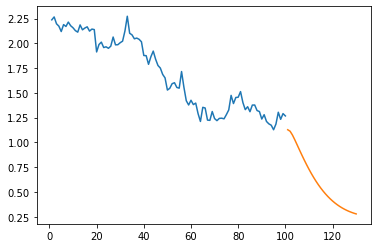

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1362:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

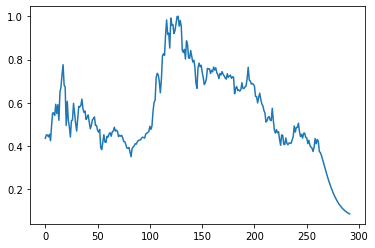

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])